附件三：dfs

4
[1, 3, 0, 2]
0.3554320110815752
5
[0, 2, 4, 1, 3]
0.0004311973971198313
6
[1, 3, 5, 0, 2, 4]
0.0004474333763937466
7
[0, 2, 4, 6, 1, 3, 5]
0.0003186782851116732
8
[0, 4, 7, 5, 2, 6, 1, 3]
0.0023719632590655237
9
[0, 2, 5, 7, 1, 3, 8, 6, 4]
0.001050430080795195
10
[0, 2, 5, 7, 9, 4, 8, 1, 3, 6]
0.0024580517056165263
11
[0, 2, 4, 6, 8, 10, 1, 3, 5, 7, 9]
0.0014434918084589299
12
[0, 2, 4, 7, 9, 11, 5, 10, 1, 6, 8, 3]
0.008191617776901694
13
[0, 2, 4, 1, 8, 11, 9, 12, 3, 5, 7, 10, 6]
0.003867183648253558
14
[0, 2, 4, 6, 11, 9, 12, 3, 13, 8, 1, 5, 7, 10]
0.07866709408699535
15
[0, 2, 4, 1, 9, 11, 13, 3, 12, 8, 5, 14, 6, 10, 7]
0.06299597612087382
16
[0, 2, 4, 1, 12, 8, 13, 11, 14, 5, 15, 6, 3, 10, 7, 9]
0.5347610422613798
17
[0, 2, 4, 1, 7, 10, 14, 6, 15, 13, 16, 3, 5, 8, 11, 9, 12]
0.3305664204453933
18
[0, 2, 4, 1, 7, 14, 11, 15, 12, 16, 5, 17, 6, 3, 10, 8, 13, 9]
2.6906872312320047
19
[0, 2, 4, 1, 3, 8, 12, 14, 16, 18, 6, 15, 17, 10, 5, 7, 9, 11, 13]
0.1818969589257904
20
[0, 2, 4, 1,

<function matplotlib.pyplot.show>

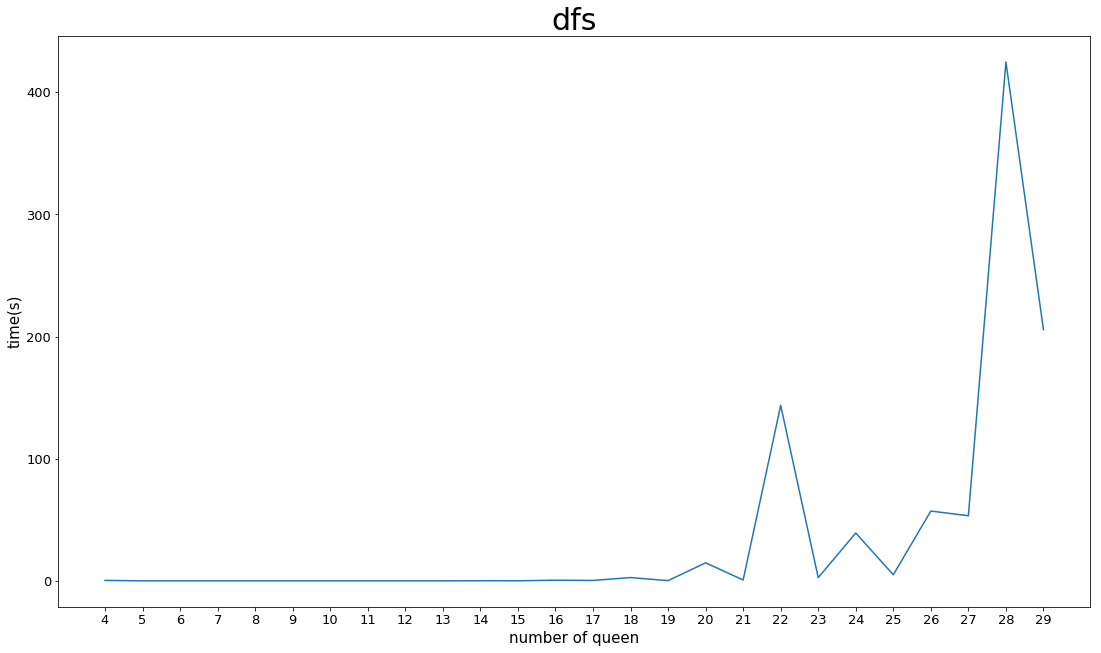

In [9]:
import time
%matplotlib inline
import matplotlib.pyplot as plt
global N

class Node(object):
    def __init__(self,parent,state,deepth):
        self.parent=parent   
        self.state=state
        self.deepth=deepth
        
        
class Graph(object):
    def __init__(self):
        self.node=[]
        
    def add_node(self,node):
        self.node.append(node)

        
def goal(node):
    global N
    state = node.state
    #print(state)
    if(len(node.state)==N):
        print(N)
        print(node.state)
        return True
    else:
        return False
    
    
def issafe(state):
    k=len(state)-1
    for i in range(k):
        if (state[i] == state[k]) or (abs(state[i] - state[k]) == (k - i)):
            return False
    return True


def open_sort(open):
    open.sort(key=lambda k: -k.deepth)

def expand(n,G,open):
    global N
    if(len(n.state)==N):
        return
    for i in range(N):
        deepth=n.deepth+1
        istate=list(n.state)
        istate.append(i)
        if(issafe(istate)==False):
            continue
        inode=Node(n,istate,deepth)
        G.add_node(inode)
        open.append(inode)
        

        
res=[]
numofqueen=range(4, 30)
for k in numofqueen:
    global N
    N = k  
    
    start=time.clock()
    open=[]
    closed=[]
    G=Graph()
    s=Node(None,[ ],0)
    open.append(s)
    G.add_node(s)

    while(len(open)):
        n=open[0]
        open=open[1:]
        closed.append(n)
        if(goal(n)):
            break
        expand(n,G,open)
        open_sort(open)
        
    end=time.clock()
    res.append(end-start)
    print(end-start)
    
#统计绘图
plt.plot(numofqueen,res)
plt.title("dfs",fontsize=30)
plt.xlabel("number of queen",fontsize=15)
plt.ylabel("time(s)",fontsize=15)
plt.xticks(numofqueen,fontsize=13)
plt.yticks(fontsize=13)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('dfs.png', dpi=100)
plt.show